In [ ]:
!pip install keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 22.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
glioma_train_dir='/content/drive/MyDrive/brain_tumour_dataset/brain_tumour/Train/Glioma/images'
meningioma_train_dir='/content/drive/MyDrive/brain_tumour_dataset/brain_tumour/Train/Meningioma/images'
no_tumour_train_dir='/content/drive/MyDrive/brain_tumour_dataset/brain_tumour/Train/No_Tumor/images'
pituitary_train_dir='/content/drive/MyDrive/brain_tumour_dataset/brain_tumour/Train/Pituitary/images'

Tr-gl_0124.jpg


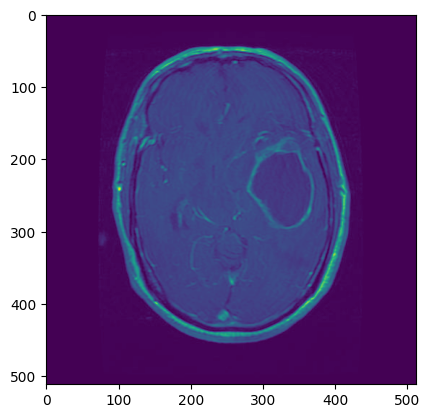

Tr-gl_0110.jpg


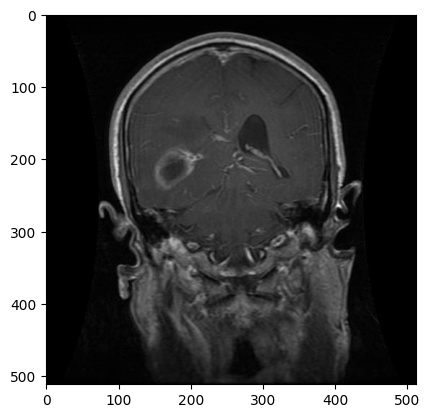

Tr-gl_0111.jpg


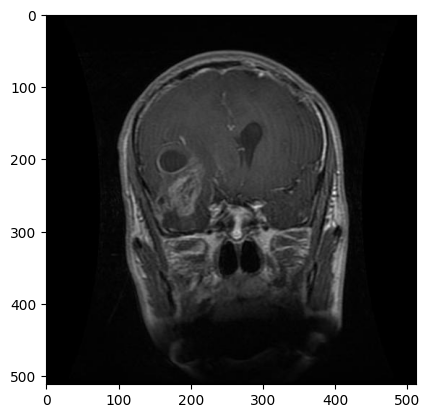

Tr-gl_0120.jpg


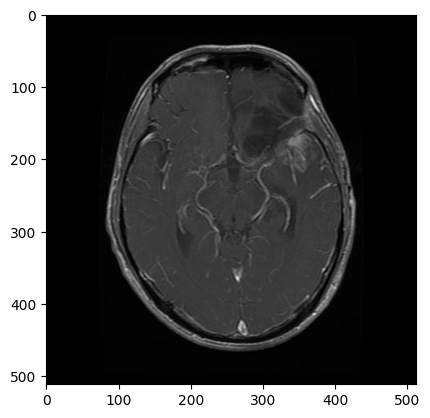

Tr-gl_0165.jpg


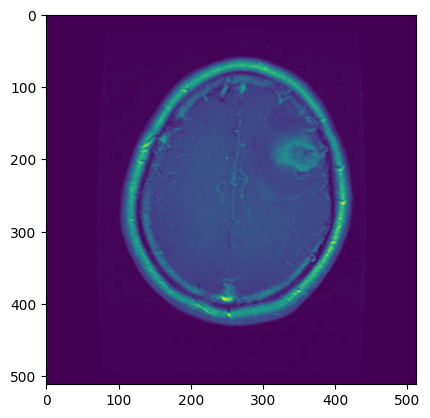

Tr-gl_0175.jpg


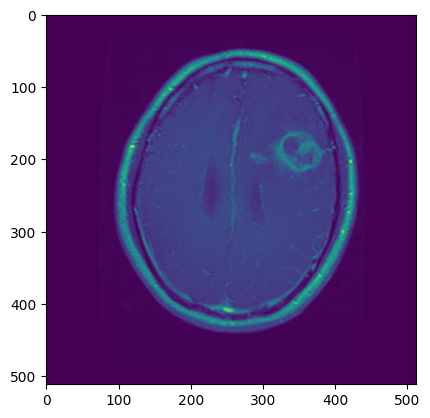

Tr-gl_0155.jpg


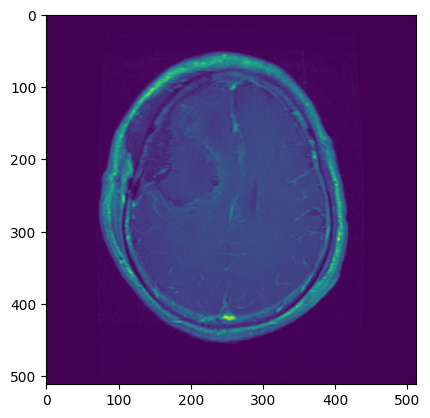

Tr-gl_0129.jpg


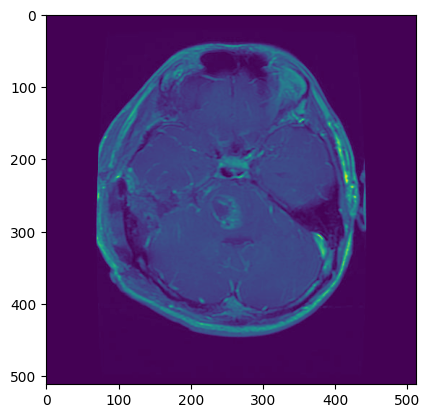

Tr-gl_0122.jpg


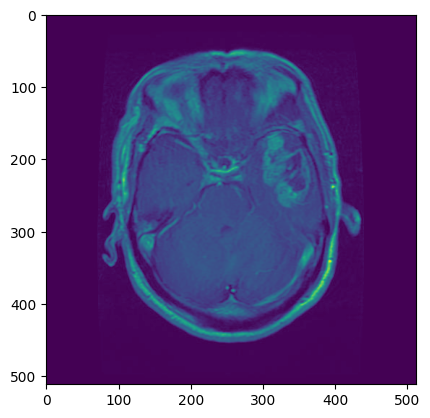

Tr-gl_0174.jpg


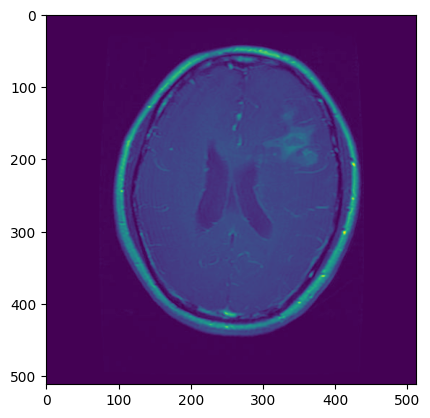

In [ ]:
glioma_data=os.listdir(glioma_train_dir)
#displays 10 sample images from the mentioned directory
def display_sample_image(image_file,directory):
  for image in image_file[:10]:
    print(image)
    image=Image.open(os.path.join(directory,image))
    plt.imshow(image)
    plt.show()
display_sample_image(glioma_data,glioma_train_dir)


Tr-me_0793.jpg


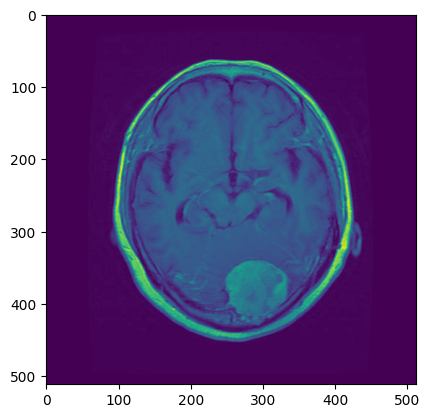

Tr-me_0774.jpg


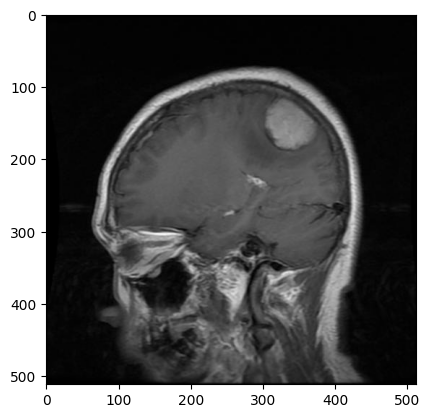

Tr-me_0779.jpg


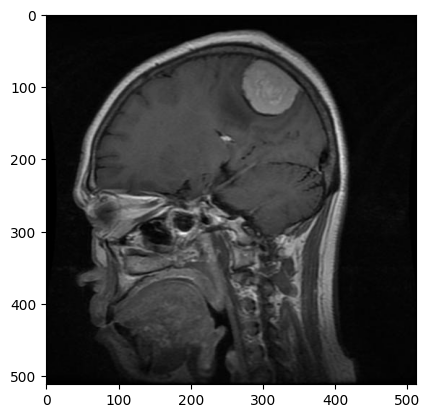

Tr-me_0773.jpg


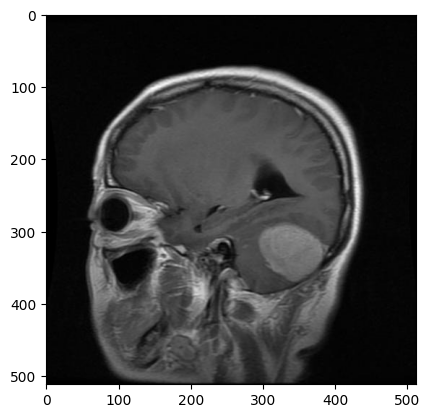

Tr-me_0789.jpg


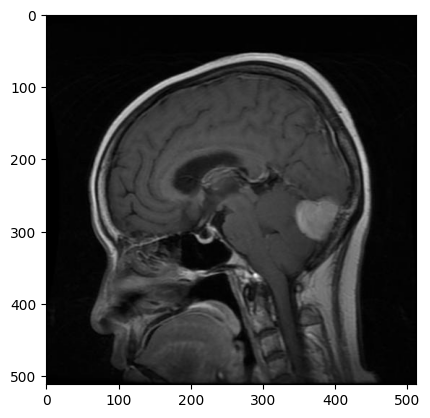

Tr-me_0775.jpg


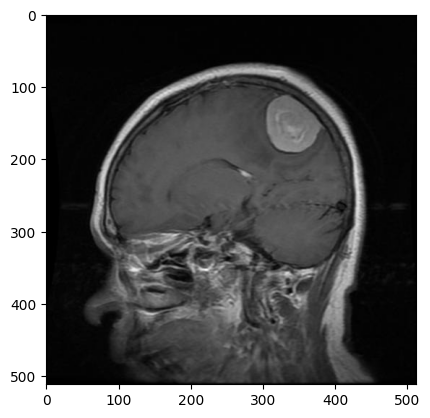

Tr-me_0781.jpg


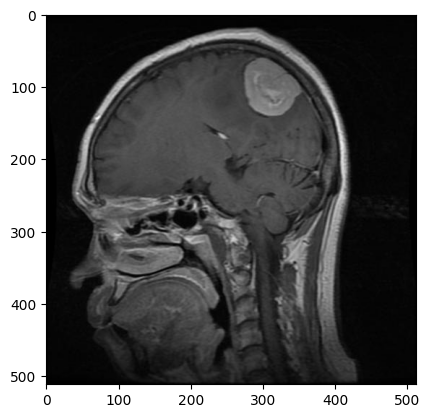

Tr-me_0768.jpg


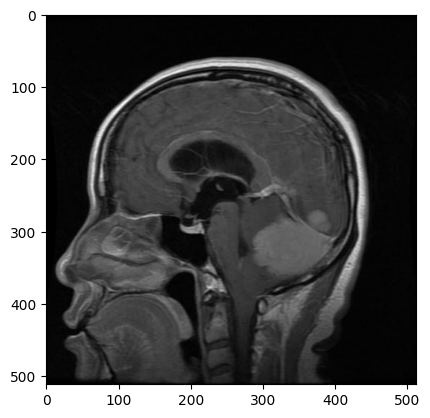

Tr-me_0765.jpg


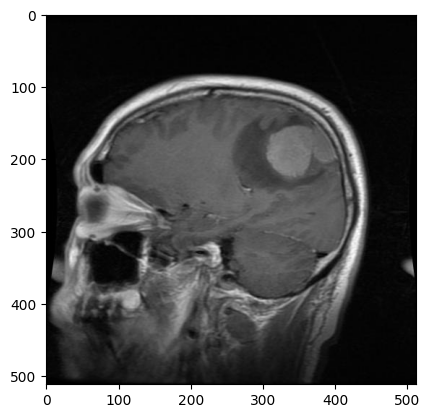

Tr-me_0754.jpg


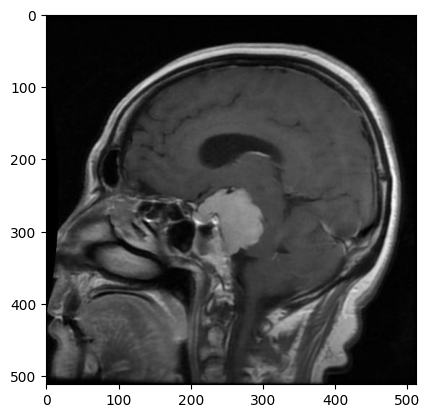

In [ ]:
meningioma_data=os.listdir(meningioma_train_dir)
display_sample_image(meningioma_data,meningioma_train_dir)

5.jpg


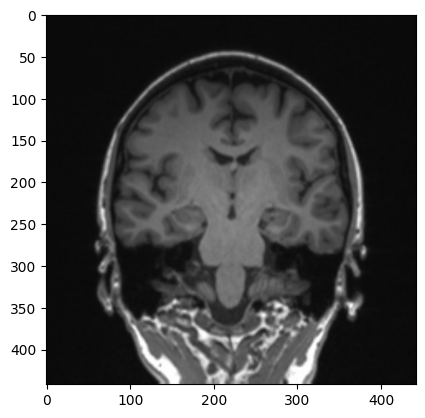

3.jpg


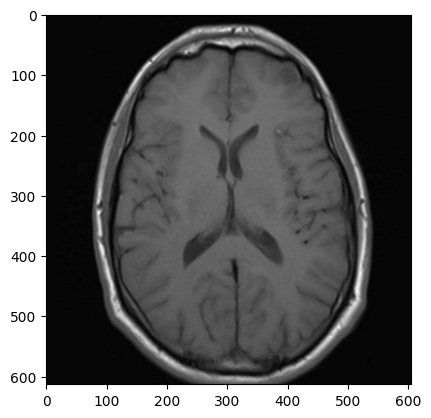

1.jpg


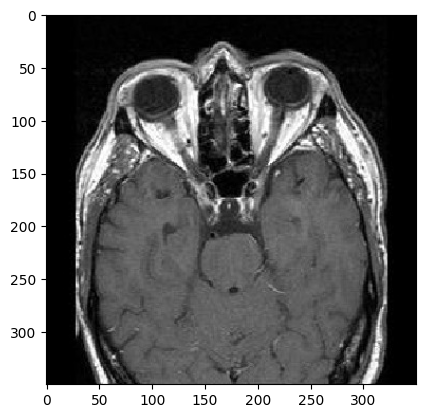

Tr-noTr_0008.jpg


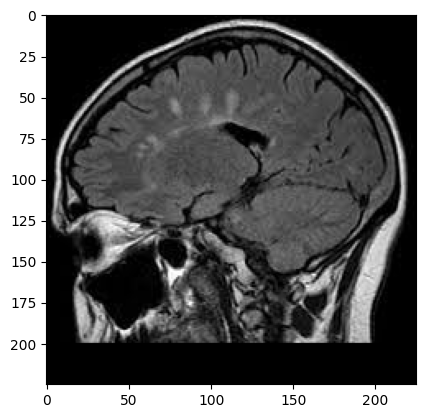

4.jpg


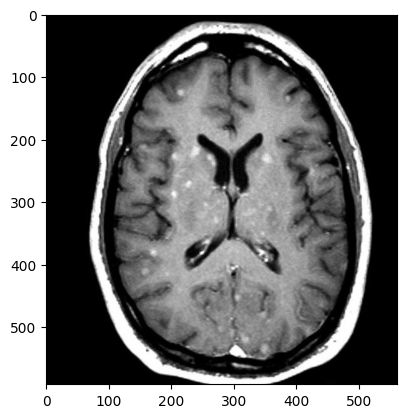

Tr-noTr_0006.jpg


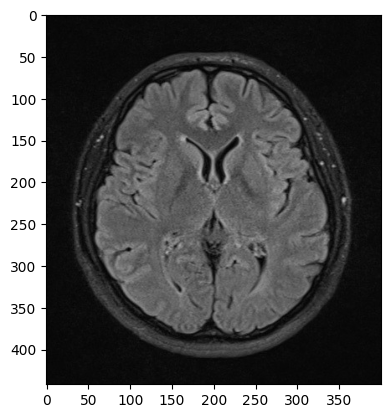

6.jpg


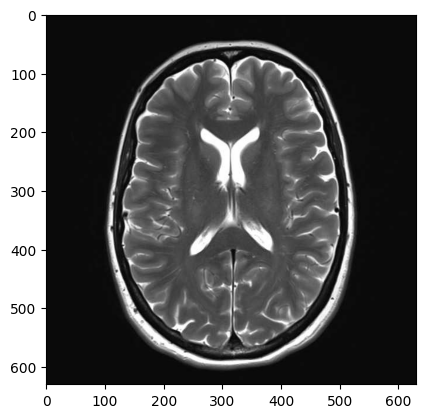

Tr-noTr_0000.jpg


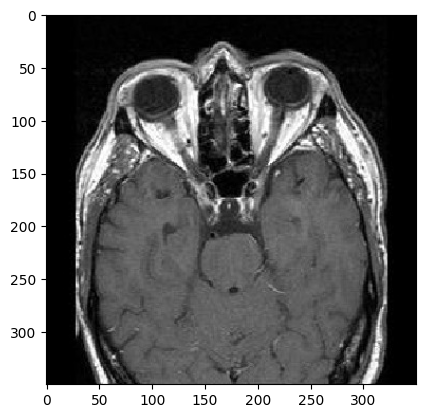

7.jpg


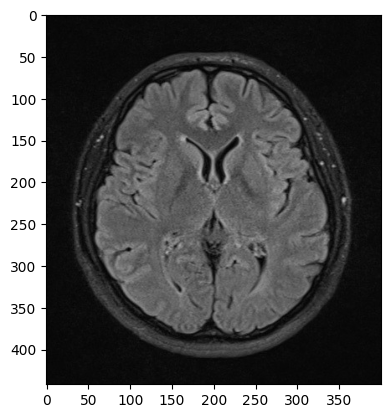

8.jpg


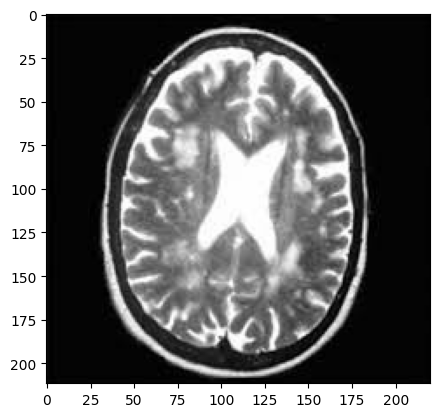

In [ ]:
no_tumour_data=os.listdir(no_tumour_train_dir)
display_sample_image(no_tumour_data,no_tumour_train_dir)

In [ ]:
def is_black_white_image(image_path):
    image = Image.open(image_path)
    grayscale = image.convert('L')
    return image.convert('RGB').tobytes() == grayscale.convert('RGB').tobytes()
count=0
for image in glioma_data:
  if is_black_white_image(os.path.join(glioma_train_dir,image)):
    count+=1
print(count)


1153


In [ ]:
print(len(glioma_data))

1153


In [ ]:
train_dir='/content/drive/MyDrive/brain_tumour_dataset/brain_tumour/Train'
val_dir='/content/drive/MyDrive/brain_tumour_dataset/brain_tumour/Val'
gen=ImageDataGenerator(rescale=1./255)
train_gen=gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical',shuffle='True')
val_gen=gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=32,class_mode='categorical',shuffle='True')
class_indices = train_gen.class_indices
class_indices

Found 4737 images belonging to 4 classes.
Found 512 images belonging to 4 classes.


{'Glioma': 0, 'Meningioma': 1, 'No_Tumor': 2, 'Pituitary': 3}

In [ ]:
early_stopping=EarlyStopping(monitor='val_loss', patience=5,verbose=1,restore_best_weights=True)
plateau=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1,min_lr=0.00001)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32,3,activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64,3,activation='relu'))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(128,3,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_gen,epochs=5,validation_data=val_gen,callbacks=[early_stopping,plateau],verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 1696s 11s/step - accuracy: 0.5573 - loss: 1.0884 - val_accuracy: 0.7852 - val_loss: 0.5505 - learning_rate: 0.0010
Epoch 2/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 813s 5s/step - accuracy: 0.8401 - loss: 0.3983 - val_accuracy: 0.8809 - val_loss: 0.3499 - learning_rate: 0.0010
Epoch 3/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 884s 6s/step - accuracy: 0.9070 - loss: 0.2384 - val_accuracy: 0.8984 - val_loss: 0.2907 - learning_rate: 0.0010
Epoch 4/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 909s 6s/step - accuracy: 0.9391 - loss: 0.1614 - val_accuracy: 0.9082 - val_loss: 0.2600 - learning_rate: 0.0010
Epoch 5/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 819s 5s/step - accuracy: 0.9665 - loss: 0.1053 - val_accuracy: 0.9062 - val_loss: 0.2692 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 4.


In [ ]:
import pickle
with open('/content/drive/MyDrive/brain_tumour_dataset/models/model_1.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/brain_tumour_dataset/models/brain_tumour.pkl','rb') as f:
  model=pickle.load(f)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,508,430 (127.82 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,954 (85.22 MB)

In [ ]:
import random
num_samples = 2000

# Initialize lists to store the images and labels
train_images = []
train_labels = []

# Iterate over the generator and extract all samples from `train_gen`
while len(train_images) < num_samples:
    img_batch, label_batch = next(train_gen)
    train_images.extend(img_batch)
    train_labels.extend(label_batch)

# Convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Randomly select 2000 samples for `test_gen`
indices = random.sample(range(len(train_images)), num_samples)
test_images = train_images[indices]
test_labels = train_labels[indices]

In [ ]:
test_datagen = ImageDataGenerator()

# Create a generator for the test samples
test_gen = test_datagen.flow(test_images, test_labels, batch_size=32)

In [ ]:
predictions = model.predict(train_gen)

# Get the class predictions (assuming output is a softmax or similar)
predicted_classes = predictions.argmax(axis=-1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 1765s 12s/step


In [ ]:
predicted_classes

array([3, 1, 3, 3, 0, 0, 0, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 0, 2, 0, 3, 1,
       3, 2, 1, 1, 0, 3, 1, 0, 1, 0, 0, 1, 3, 2, 1, 1, 0, 3, 3, 0, 2, 2,
       3, 1, 0, 3, 0, 2, 1, 0, 3, 2, 3, 2, 2, 1, 1, 0, 0, 3, 0, 3, 1, 2,
       1, 0, 2, 1, 2, 0, 3, 2, 0, 1, 3, 2, 1, 0, 1, 0, 1, 3, 2, 2, 1, 2,
       0, 1, 1, 1, 3, 0, 1, 3, 0, 0, 1, 2, 0, 0, 0, 3, 2, 2, 1, 3, 2, 3,
       1, 3, 3, 1, 0, 3, 2, 1, 1, 3, 1, 1, 0, 3, 0, 0, 0, 0, 3, 2, 1, 1,
       3, 0, 3, 1, 2, 1, 1, 1, 2, 0, 0, 3, 3, 0, 3, 0, 1, 3, 0, 2, 0, 3,
       0, 2, 1, 3, 3, 1, 3, 3, 2, 1, 1, 0, 2, 3, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 3, 0, 1, 1, 1, 2, 3, 2, 2, 1, 3, 0, 0, 1, 0, 1, 0, 2, 1, 3, 2,
       0, 3, 0, 3, 1, 2, 0, 1, 1, 1, 3, 2, 3, 1, 1, 0, 2, 0, 3, 1, 1, 1,
       3, 3, 2, 1, 0, 1, 1, 3, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 2, 3, 0, 1,
       1, 3, 3, 3, 3, 0, 3, 0, 3, 1, 2, 2, 1, 0, 0, 3, 0, 1, 0, 3, 3, 2,
       0, 3, 1, 3, 0, 0, 1, 3, 0, 3, 0, 3, 2, 2, 3, 0, 3, 0, 2, 3, 1, 1,
       3, 3, 0, 1, 0, 1, 2, 1, 3, 2, 1, 1, 0, 3, 0,

In [ ]:
true_labels = train_gen.classes
predicted_classes
#Compare predicted and true labels
correct = predicted_classes == true_labels
accuracy = correct.sum() / len(true_labels)
print(f'Manual Accuracy: {accuracy * 100:.2f}%')


Manual Accuracy: 27.59%


In [ ]:
accuracy = correct.sum() / len(true_labels)
print(f'Manual Accuracy: {accuracy * 100:.2f}%')

Manual Accuracy: 27.59%


In [ ]:
from sklearn.metrics import recall_score, f1_score
recall = recall_score(true_labels, predicted_classes, average='weighted')
print(f"Recall: {recall}")

# Compute F1 score
f1 = f1_score(true_labels, predicted_classes, average='weighted')
print(f"F1 Score: {f1}")

Recall: 0.2759130251213848
F1 Score: 0.2752843593535017
